# Generate hexagonal image data

In [1]:
################################################################################
# Imports
################################################################################

import astropy.units     as u
import matplotlib.pyplot as plt
import numpy             as np

from ctapipe.image         import toymodel
from ctapipe.instrument    import CameraGeometry
from ctapipe.visualization import CameraDisplay

In [2]:
################################################################################
# Parameters
################################################################################

camgeoms = (
	'HESS-I',
	'HESS-II',
	'VERITAS',
	'Whipple109',
	'Whipple151'
)

In [3]:
################################################################################
# Initialization
################################################################################

camgeoms_len = len(camgeoms)

> (1/5) camgeom=HESS-I


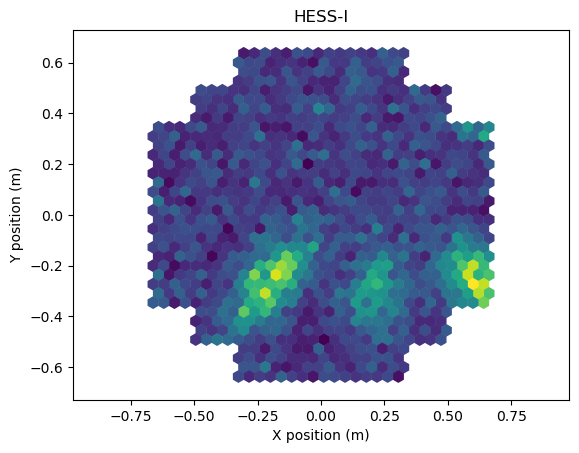

> (2/5) camgeom=HESS-II


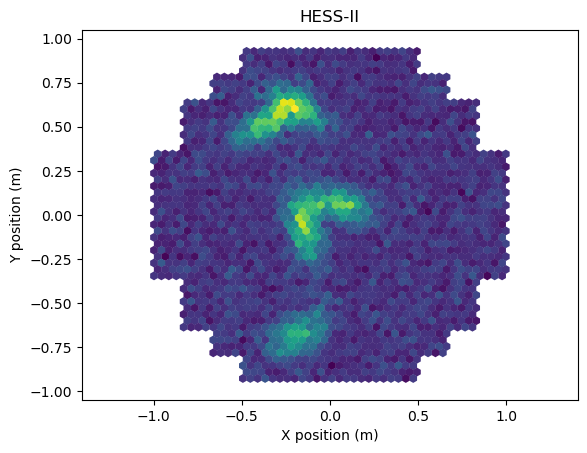

> (3/5) camgeom=VERITAS


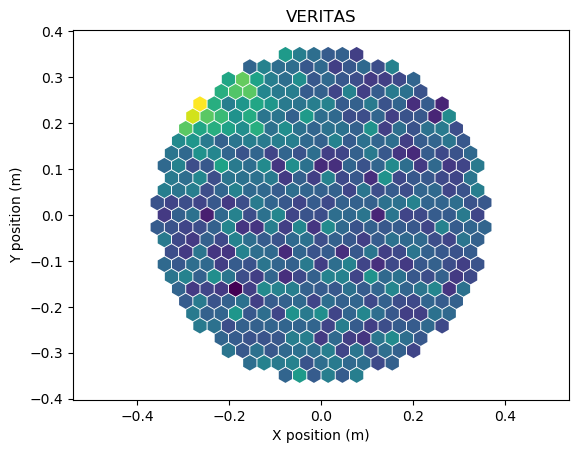

> (4/5) camgeom=Whipple109


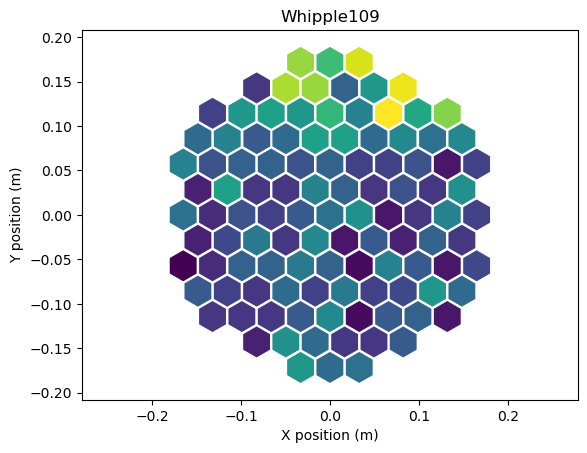

> (5/5) camgeom=Whipple151


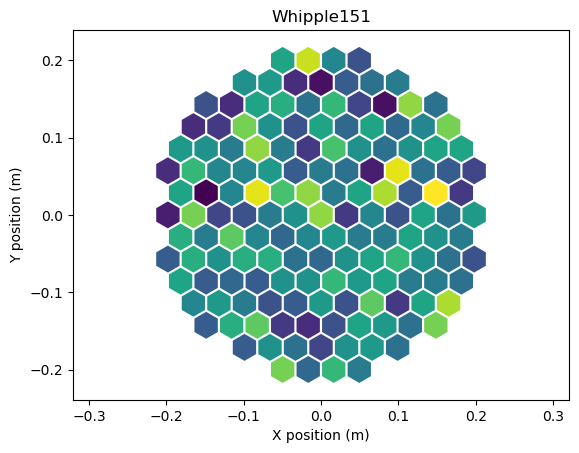

In [4]:
################################################################################
# Visualize hexagonal camera geometries and randomized generation
################################################################################

for camgeom_index, camgeom in enumerate(camgeoms):
	print(f'> ({camgeom_index + 1:{len(str(camgeoms_len))}}/{camgeoms_len}) camgeom={camgeom}')

	geom = CameraGeometry.from_name(camgeom)


	image = np.zeros(geom.n_pixels)

	for i in range(5):
		model = toymodel.Gaussian(
			x      = np.random.uniform(-0.8,  0.8)       * u.m,
			y      = np.random.uniform(-0.8,  0.8)       * u.m,
			width  = np.random.uniform( 0.05, 0.075)     * u.m,
			length = np.random.uniform( 0.1,  0.15)      * u.m,
			psi    = np.random.uniform( 0,    2 * np.pi) * u.rad)

		new_image, sig, bg = model.generate_image(
			geom,
			intensity    = np.random.uniform(1000, 3000),
			nsb_level_pe = 5)

		image += new_image


	disp = CameraDisplay(geom, image=image)
	plt.show(disp)